We train a tree from the dataset that we had saved in a previous notebook.

In [1]:
from fastai.tabular.all import *

comp = 'bluebook-for-bulldozers'
path = URLs.path(comp)

to = load_pickle(path/'to.pkl')
dep_var = 'SalePrice'
xs, y = to.train.xs, to.train.y

We instantiate a toy model and train fit it to training data.

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

m = DecisionTreeRegressor(max_leaf_nodes=4)

m.fit(to.train.xs, to.train.y);

We first visualize this tree with `plot_tree`.

[Text(0.6, 0.875, 'Coupler_System <= 0.5\nsquared_error = 0.482\nsamples = 404710\nvalue = 10.104'),
 Text(0.4, 0.625, 'YearMade <= 1991.5\nsquared_error = 0.417\nsamples = 360847\nvalue = 10.213'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'squared_error = 0.375\nsamples = 155724\nvalue = 9.969'),
 Text(0.6, 0.375, 'fiProductClassDesc <= 13.5\nsquared_error = 0.37\nsamples = 205123\nvalue = 10.398'),
 Text(0.4, 0.125, 'squared_error = 0.206\nsamples = 79749\nvalue = 10.095'),
 Text(0.8, 0.125, 'squared_error = 0.378\nsamples = 125374\nvalue = 10.592'),
 Text(0.8, 0.625, 'squared_error = 0.115\nsamples = 43863\nvalue = 9.208'),
 Text(0.7, 0.75, '  False')]

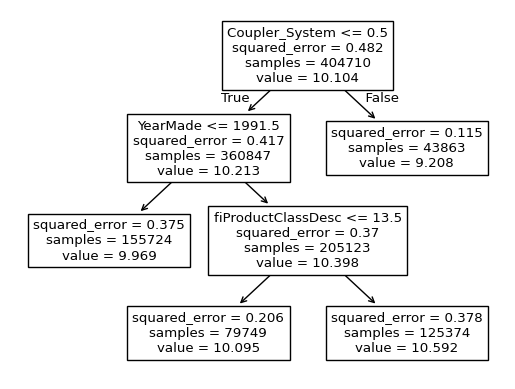

In [3]:
plot_tree(m, feature_names=list(xs.columns))

We can use a library to visualize it as such.

In [4]:
import dtreeviz

samp_idx = np.random.permutation(len(y))[:500]
viz_model = dtreeviz.model(m,
    X_train=xs.iloc[samp_idx], y_train=y.iloc[samp_idx],
    feature_names=xs.columns, target_name=dep_var)

/home/jhanschoo/.local/share/hatch/env/virtual/fai/Rcp_9cR7/fastbook/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


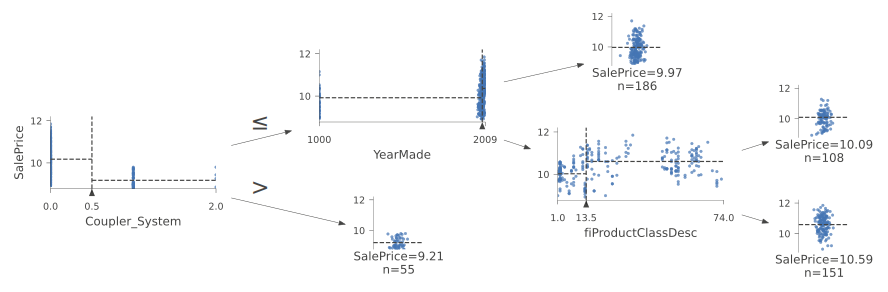

In [5]:
viz_model.view(
    fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
    orientation='LR')

We see that there is an issue with the `YearMade` feature. It seems that missing values are assigned the value `1000`. This is actually alright for fitting a decision tree, but makes the decision tree hard to read. Let us thus replace these values in our copy `xs`.

In [6]:
xs.loc[xs['YearMade'] < 1900, 'YearMade'] = 1950


/home/jhanschoo/.local/share/hatch/env/virtual/fai/Rcp_9cR7/fastbook/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


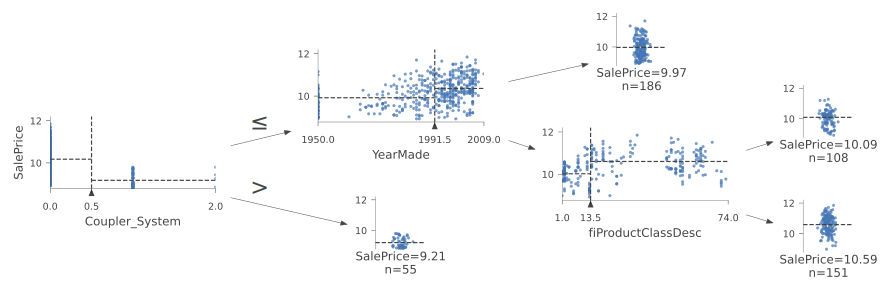

In [7]:
viz_model = dtreeviz.model(m,
    X_train=xs.iloc[samp_idx], y_train=y.iloc[samp_idx],
    feature_names=xs.columns, target_name=dep_var)
viz_model.view(
    fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
    orientation='LR')
